## 1 Линейная алгебра

### Задание 1

In [11]:
import numpy as np

A = np.array([[2, -4], 
              [3, 5], 
              [-1, 0]])

B = np.array([[1, 2, 7], 
              [-3, -4, 0], 
              [5, 2, 1]])

C = np.array([[6, -3, 9], 
              [4, -5, 2], 
              [8, 1, 5]])

# 1. Вычисляем транспонированные матрицы
A_transposed = A.T
B_transposed = B.T

# 2. Вычисляем A^T * C
ATC = np.dot(A_transposed, C)

# 3. Вычисляем A^T * B^T
ATBT = np.dot(A_transposed, B_transposed)

# 4. Умножаем A^T * B^T на 2
two_ATBT = 2 * ATBT

# 5. Вычисляем окончательный результат D = A^T * C - 2 * A^T * B^T
D = ATC - two_ATBT

print("Матрица D = A^T * C - 2 * A^T * B^T:")
print(D)

Матрица D = A^T * C - 2 * A^T * B^T:
[[ 14  14 -11]
 [-16   3  -6]]


### Задание 2

In [12]:
import numpy as np

# Определим матричные уравнения как систему линейных уравнений
# Уравнение: 3*A + 2*B = C, где:
# A = [[x, 2, 3], [-1, y, 4]]
# B = [[1, 2, -5], [2, -6, z]]
# C = [[8, v, -1], [1, 6, 4]]

# Для каждого элемента матрицы составим уравнение:
# 1) Для элемента (0,0): 3*x + 2*1 = 8 → 3x + 2 = 8 → 3x = 6 → x = 2
# 2) Для элемента (0,1): 3*2 + 2*2 = v → 6 + 4 = v → v = 10
# 3) Для элемента (0,2): 3*3 + 2*(-5) = -1 → 9 - 10 = -1 (уже верно, не содержит неизвестных)
# 4) Для элемента (1,0): 3*(-1) + 2*2 = 1 → -3 + 4 = 1 (уже верно, не содержит неизвестных)
# 5) Для элемента (1,1): 3*y + 2*(-6) = 6 → 3y - 12 = 6 → 3y = 18 → y = 6
# 6) Для элемента (1,2): 3*4 + 2*z = 4 → 12 + 2z = 4 → 2z = -8 → z = -4

# Результаты:
x = 2
y = 6
z = -4
v = 10

# Проверим решение подстановкой
A = np.array([[x, 2, 3], [-1, y, 4]])
B = np.array([[1, 2, -5], [2, -6, z]])
C_expected = np.array([[8, v, -1], [1, 6, 4]])

C_calculated = 3*A + 2*B

print("Решение:")
print(f"x = {x}, y = {y}, z = {z}, v = {v}\n")

print("Проверка:")
print("3*A + 2*B =")
print(C_calculated)
print("\nОжидаемый результат:")
print(C_expected)

# Проверим, совпадают ли матрицы
if np.array_equal(C_calculated, C_expected):
    print("\nПроверка пройдена успешно!")
else:
    print("\nОшибка в решении!")

Решение:
x = 2, y = 6, z = -4, v = 10

Проверка:
3*A + 2*B =
[[ 8 10 -1]
 [ 1  6  4]]

Ожидаемый результат:
[[ 8 10 -1]
 [ 1  6  4]]

Проверка пройдена успешно!


### Задание 3

In [13]:
import numpy as np

# Задаем векторы в стандартном базисе
a1 = np.array([2, -5])
a2 = np.array([-1, 3])
x = np.array([1, -4])

## Часть (a): Нахождение координат x в базисе B

# 1. Проверка линейной независимости a1 и a2
matrix = np.column_stack((a1, a2))
det = np.linalg.det(matrix)

if np.isclose(det, 0):
    print("Векторы a1 и a2 линейно зависимы, не могут образовывать базис")
else:
    print(f"Векторы a1 и a2 линейно независимы (детерминант = {det:.2f}), образуют базис B")
    
    # 2. Решаем уравнение x = c1*a1 + c2*a2 относительно c1, c2
    # Это эквивалентно решению системы matrix * [c1, c2]^T = x
    x_B = np.linalg.solve(matrix, x)
    print(f"\n(a) Координаты вектора x в базисе B: [x]_B = ({x_B[0]:.2f}, {x_B[1]:.2f})^T")

    ## Часть (b): Нахождение стандартных координат вектора y
    y_B = np.array([1, 1])  # [y]_B = (1, 1)^T
    
    # y = 1*a1 + 1*a2
    y_standard = y_B[0] * a1 + y_B[1] * a2
    print(f"(b) Координаты вектора y в стандартном базисе: y = ({y_standard[0]:.2f}, {y_standard[1]:.2f})^T")

Векторы a1 и a2 линейно независимы (детерминант = 1.00), образуют базис B

(a) Координаты вектора x в базисе B: [x]_B = (-1.00, -3.00)^T
(b) Координаты вектора y в стандартном базисе: y = (1.00, -2.00)^T


### Задание 4

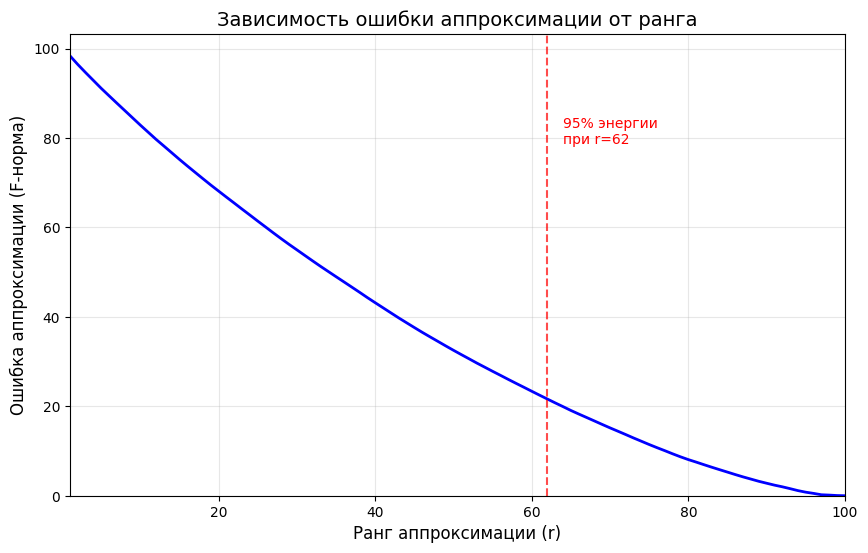

In [14]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

# Параметры эксперимента
n = 100  # размер матрицы
ranks = np.arange(1, 101)  # ранги для аппроксимации от 1 до 100

# 1. Генерация случайной матрицы
np.random.seed(42)  # для воспроизводимости
A = np.random.randn(n, n)

# 2. Выполнение сингулярного разложения
U, s, Vh = svd(A, full_matrices=False)
S = np.diag(s)  # преобразуем вектор сингулярных значений в диагональную матрицу

# 3. Вычисление ошибок для разных рангов
errors = []

for r in ranks:
    # Малоранговая аппроксимация
    A_approx = U[:, :r] @ S[:r, :r] @ Vh[:r, :]
    
    # Вычисление ошибки (норма Фробениуса)
    error = np.linalg.norm(A - A_approx, 'fro')
    errors.append(error)

# 4. Построение графика
plt.figure(figsize=(10, 6))
plt.plot(ranks, errors, 'b-', linewidth=2)
plt.xlabel('Ранг аппроксимации (r)', fontsize=12)
plt.ylabel('Ошибка аппроксимации (F-норма)', fontsize=12)
plt.title('Зависимость ошибки аппроксимации от ранга', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xlim(1, n)
plt.ylim(0, max(errors)*1.05)

# Добавим линию для 95% энергии
total_energy = np.sum(s**2)
energy_level = 0.95 * total_energy
cumulative_energy = np.cumsum(s**2)
r_95 = np.argmax(cumulative_energy >= energy_level) + 1

plt.axvline(x=r_95, color='r', linestyle='--', alpha=0.7)
plt.text(r_95+2, max(errors)*0.8, f'95% энергии\nпри r={r_95}', color='r')

plt.show()

## 2 Начала мат.анализа и оптимизации

### Задание 1

In [15]:
import numpy as np
from scipy.optimize import fsolve

def f(x):
    return x[0]**3 - 2*x[0]*x[1] + x[1]**2 - 3*x[0] - 2*x[1]

def gradient(x):
    return np.array([
        3*x[0]**2 - 2*x[1] - 3,  # df/dx1
        -2*x[0] + 2*x[1] - 2      # df/dx2
    ])

# Находим критические точки численно
critical_points = []
initial_guesses = [[0, 0], [2, 3]]  # Начальные приближения

for guess in initial_guesses:
    solution = fsolve(gradient, guess)
    critical_points.append(solution)

print("Критические точки:")
for i, point in enumerate(critical_points, 1):
    print(f"x_c^{i} = ({point[0]:.6f}, {point[1]:.6f})")

# Проверка градиента в критических точках
print("\nПроверка градиента в критических точках:")
for point in critical_points:
    grad = gradient(point)
    print(f"В точке ({point[0]:.2f}, {point[1]:.2f}): grad = [{grad[0]:.2e}, {grad[1]:.2e}]")

Критические точки:
x_c^1 = (-1.000000, 0.000000)
x_c^2 = (1.666667, 2.666667)

Проверка градиента в критических точках:
В точке (-1.00, 0.00): grad = [0.00e+00, 0.00e+00]
В точке (1.67, 2.67): grad = [-8.88e-16, 0.00e+00]


### Задание 2

In [16]:
import sympy as sp

# Определяем символьные переменные
x1, x2 = sp.symbols('x1 x2', positive=True)  # x1 > 0, x2 > 0 для корректности логарифма и корней

# Определяем функцию
f = sp.ln(sp.sqrt(x1) + sp.sqrt(x2))

# Вычисляем частные производные
df_dx1 = sp.diff(f, x1)
df_dx2 = sp.diff(f, x2)

# Вычисляем левую часть уравнения
left_side = x1 * df_dx1 + x2 * df_dx2

# Упрощаем выражение
simplified = sp.simplify(left_side)

print("Функция f =", f)
print("\nЧастная производная по x1:")
print("∂f/∂x1 =", df_dx1)
print("\nЧастная производная по x2:")
print("∂f/∂x2 =", df_dx2)
print("\nЛевая часть уравнения (x1*∂f/∂x1 + x2*∂f/∂x2):")
print("Результат =", simplified)

# Проверяем равенство 1/2
if simplified == sp.Rational(1, 2):
    print("\nУравнение выполняется: x1*∂f/∂x1 + x2*∂f/∂x2 = 1/2")
else:
    print("\nУравнение не выполняется")

Функция f = log(sqrt(x1) + sqrt(x2))

Частная производная по x1:
∂f/∂x1 = 1/(2*sqrt(x1)*(sqrt(x1) + sqrt(x2)))

Частная производная по x2:
∂f/∂x2 = 1/(2*sqrt(x2)*(sqrt(x1) + sqrt(x2)))

Левая часть уравнения (x1*∂f/∂x1 + x2*∂f/∂x2):
Результат = 1/2

Уравнение выполняется: x1*∂f/∂x1 + x2*∂f/∂x2 = 1/2


### Задание 3

In [17]:
import numpy as np
import sympy as sp

# Определяем символьные переменные
x, y, z = sp.symbols('x y z')

# Определяем функцию
f = x + y + z + (x*y*z)**2

# Вычисляем градиент (вектор частных производных)
gradient_f = [sp.diff(f, var) for var in (x, y, z)]

print("Градиент функции f(x,y,z):")
print(f"∇f = ({gradient_f[0]}, {gradient_f[1]}, {gradient_f[2]})")

# Вычисляем численное значение градиента в точке v = (1, 2, 3)
v = (1, 2, 3)
grad_at_v = [expr.subs({x:v[0], y:v[1], z:v[2]}) for expr in gradient_f]

print("\nЗначение градиента в точке v = (1, 2, 3):")
print(f"∇f(v) = ({grad_at_v[0]}, {grad_at_v[1]}, {grad_at_v[2]})")

# Альтернативное решение с численными вычислениями
def f_numeric(x, y, z):
    return x + y + z + (x*y*z)**2

def gradient_numeric(x, y, z):
    df_dx = 1 + 2*x * (y*z)**2
    df_dy = 1 + 2*y * (x*z)**2
    df_dz = 1 + 2*z * (x*y)**2
    return np.array([df_dx, df_dy, df_dz])

grad_num = gradient_numeric(*v)
print("\nЧисленный расчет градиента:")
print(f"∇f(v) = {grad_num}")

Градиент функции f(x,y,z):
∇f = (2*x*y**2*z**2 + 1, 2*x**2*y*z**2 + 1, 2*x**2*y**2*z + 1)

Значение градиента в точке v = (1, 2, 3):
∇f(v) = (73, 37, 25)

Численный расчет градиента:
∇f(v) = [73 37 25]


### Задание 4 

In [18]:
import numpy as np

def compute_gradient(x):
    """Вычисляет градиент функции f(x) = ||x||_2"""
    norm = np.linalg.norm(x)
    if norm == 0:
        raise ValueError("Норма вектора не может быть нулевой (x ∈ R^n \\ {0})")
    return x / norm

def compute_differential(x, dx):
    """Вычисляет дифференциал df(x) = (x^T dx)/||x||"""
    norm = np.linalg.norm(x)
    if norm == 0:
        raise ValueError("Норма вектора не может быть нулевой (x ∈ R^n \\ {0})")
    return np.dot(x, dx) / norm

# Пример использования
n = 3  # Размерность пространства
x = np.array([1, 2, 3])  # Точка в R^3
dx = np.array([0.1, 0.2, 0.3])  # Приращение

try:
    grad = compute_gradient(x)
    diff = compute_differential(x, dx)
    
    print(f"Входной вектор x: {x}")
    print(f"Градиент ∇f(x): {grad}")
    print(f"Дифференциал df(x) для dx={dx}: {diff:.4f}")
    
    # Проверка аналитического решения
    analytical_grad = x / np.linalg.norm(x)
    print("\nПроверка аналитического решения:")
    print(f"Вычисленный градиент: {grad}")
    print(f"Аналитический градиент: {analytical_grad}")
    print(f"Совпадают: {np.allclose(grad, analytical_grad)}")
    
except ValueError as e:
    print(f"Ошибка: {e}")

Входной вектор x: [1 2 3]
Градиент ∇f(x): [0.26726124 0.53452248 0.80178373]
Дифференциал df(x) для dx=[0.1 0.2 0.3]: 0.3742

Проверка аналитического решения:
Вычисленный градиент: [0.26726124 0.53452248 0.80178373]
Аналитический градиент: [0.26726124 0.53452248 0.80178373]
Совпадают: True


### Задание 5

In [19]:
import numpy as np

def compute_gradient(A, x):
    """Вычисляет градиент функции f(x) = ||Ax||_3"""
    Ax = A @ x
    norm_3 = np.linalg.norm(Ax, ord=3)
    if norm_3 == 0:
        raise ValueError("Норма Ax не может быть нулевой (x ∈ R^n \\ {0})")
    return A.T @ (Ax**2) / (norm_3**2)

def compute_differential(A, x, dx):
    """Вычисляет дифференциал df(x)"""
    Ax = A @ x
    norm_3 = np.linalg.norm(Ax, ord=3)
    if norm_3 == 0:
        raise ValueError("Норма Ax не может быть нулевой (x ∈ R^n \\ {0})")
    return (Ax**2).T @ (A @ dx) / (norm_3**2)

# Пример использования
n = 3  # Размерность x
m = 2  # Размерность Ax

# Случайная матрица A
A = np.array([[1, 2, 3], 
              [4, 5, 6]])

# Точка x и приращение dx
x = np.array([1, -1, 2])
dx = np.array([0.1, -0.2, 0.3])

try:
    grad = compute_gradient(A, x)
    diff = compute_differential(A, x, dx)
    
    print(f"Матрица A:\n{A}")
    print(f"\nВходной вектор x: {x}")
    print(f"\nГрадиент ∇f(x): {grad}")
    print(f"\nДифференциал df(x) для dx={dx}: {diff:.4f}")
    
    # Численная проверка градиента
    h = 1e-6
    numerical_grad = np.zeros_like(x)
    for i in range(len(x)):
        x_perturbed = x.copy()
        x_perturbed[i] += h
        f_plus = np.linalg.norm(A @ x_perturbed, ord=3)
        x_perturbed[i] -= 2*h
        f_minus = np.linalg.norm(A @ x_perturbed, ord=3)
        numerical_grad[i] = (f_plus - f_minus) / (2*h)
    
    print("\nЧисленная проверка градиента:")
    print(f"Аналитический градиент: {grad}")
    print(f"Численный градиент:     {numerical_grad}")
    print(f"Относительная погрешность: {np.linalg.norm(grad - numerical_grad)/np.linalg.norm(grad):.2e}")
    
except ValueError as e:
    print(f"Ошибка: {e}")

Матрица A:
[[1 2 3]
 [4 5 6]]

Входной вектор x: [ 1 -1  2]

Градиент ∇f(x): [3.96226513 5.09878912 6.2353131 ]

Дифференциал df(x) для dx=[ 0.1 -0.2  0.3]: 1.2471

Численная проверка градиента:
Аналитический градиент: [3.96226513 5.09878912 6.2353131 ]
Численный градиент:     [1961653       0 3114816]
Относительная погрешность: 4.10e+05
